In [1]:
#Importando a maioria das bibliotecas necessárias

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from scipy.cluster.vq import kmeans, vq
from pylab import plot, show
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D


## Para setar o display do Pandas com um máximo de colunas aumentado
pd.set_option('display.max_columns', 110)
pd.set_option('display.width', 100000)

In [2]:
#importando o data set e dando uma olhada

df = pd.read_csv(r'tabela_final.csv', index_col='id_cliente')
df.head()

,pedidos_efetivos,max_pedido,min_pedido,tk_med_pedido,desvio_padrao_pedido,tk_ano,pedidos_ano,data_cadastro,data_ult_pedido,frequencia_med,frequencia_std,recencia_max,18,46,54,58,65,99,147,255,325,378
id_cliente,,,,,,,,,,,,,,,,,,,,,,
3,1299.0,2520.000000,50.500000,498.963867,355.184143,163267.883534,327.213621,1450.0,3.0,1.050678,2.810389,55.016411,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1072,242.0,4252.399902,111.599998,769.517883,753.504761,63038.079443,81.918906,1079.0,2.0,4.137238,10.152554,53.610441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1456,237.0,6852.000000,191.250000,1699.367920,1080.818848,146664.432788,86.305334,1003.0,7.0,3.427059,6.708412,56.178038,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
130,133.0,4469.799805,201.630005,880.992554,888.462769,32446.618742,36.829606,1319.0,261.0,7.666422,25.628239,294.976786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4211,117.0,2934.239990,200.160004,678.845032,401.272797,47170.622342,69.486585,615.0,33.0,4.809147,6.982436,42.893191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [3]:
print(df.shape)
print('#' * 45)
print(df.info())
print('#' * 125)
print(df.describe().T)

(698, 22)
#############################################
<class 'pandas.core.frame.DataFrame'>
Int64Index: 698 entries, 3 to 525972
Data columns (total 22 columns):
pedidos_efetivos        698 non-null float64
max_pedido              698 non-null float64
min_pedido              698 non-null float64
tk_med_pedido           698 non-null float64
desvio_padrao_pedido    698 non-null float64
tk_ano                  698 non-null float64
pedidos_ano             698 non-null float64
data_cadastro           698 non-null float64
data_ult_pedido         698 non-null float64
frequencia_med          698 non-null float64
frequencia_std          698 non-null float64
recencia_max            698 non-null float64
18                      698 non-null float64
46                      698 non-null float64
54                      698 non-null float64
58                      698 non-null float64
65                      698 non-null float64
99                      698 non-null float64
147                     69

Como pretendo usar o modelo K-means, preciso que os dados estejam na mesma escala, já que pretendemos encontrar distancia entre pontos.

In [4]:
# Fazendo o Scale dos dados:
# Faremos com uma cópia, pois não queremos perder a interpretabilidade dos nossos dados
X = df.values.copy()

sc = MinMaxScaler()

X = sc.fit_transform(X)

In [5]:
df2 = pd.DataFrame(X)
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,1.000000,0.117390,0.003214,0.041426,0.025644,0.219793,0.729793,1.000000,0.001618,0.002309,0.007441,0.050863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.185670,0.198860,0.009826,0.065014,0.054402,0.084836,0.182237,0.743253,0.000809,0.009093,0.026880,0.049564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.181818,0.321112,0.018446,0.146080,0.078033,0.197437,0.192029,0.690657,0.004854,0.007532,0.017761,0.051937,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.101695,0.209084,0.019569,0.074732,0.064145,0.043645,0.081587,0.909343,0.210356,0.016850,0.067853,0.272710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.089368,0.136870,0.019410,0.057108,0.028971,0.063471,0.154485,0.422145,0.025890,0.010570,0.018487,0.039655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Após a realização do Scale, precisamos saber a quantidade ideal de Clusters para o modelo.
Serão usadas duas táticas:

* Método do Cotovelo

* Método silhouette_score

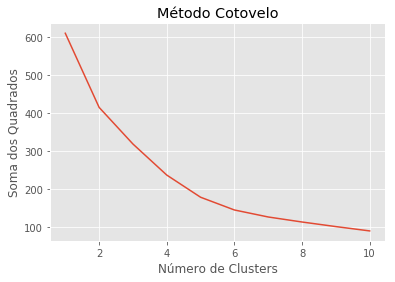

In [6]:
# Fazendo o metodo cotovelo:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 100, n_jobs=-1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    

plt.plot(range(1, 11), wcss)
plt.title('Método Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma dos Quadrados') #within cluster sum of squares
plt.show()

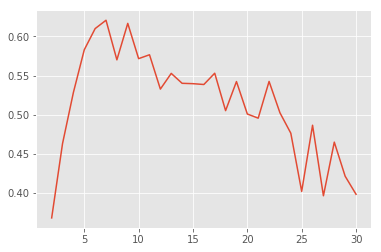

In [7]:
# Fazendo o metodo de silhueta

from sklearn.metrics import silhouette_score   ## variância ideal é aquela mais perto de 1, por isso queremos o maior silhouette score

sillhoute_scores = []
n_cluster_list = np.arange(2,31).astype(int)

for n_cluster in n_cluster_list:
    kmeans = KMeans(n_clusters=n_cluster)
    cluster_found = kmeans.fit_predict(X)
    sillhoute_scores.append(silhouette_score(X, kmeans.labels_))
    
plt.plot(n_cluster_list,sillhoute_scores)

Podemos considerar o número idela de Clusters para o Data Set Normalizado (Scaled) sendo 6.
O método cotovelo tem algumas inflexões na curva e a que melhor carrega variância ao modelo é com 5-6 clusters.
Semelhantemente, o método de silhueta tem seu primeiro pico em 7 clusters, para este modelo quando mais próximo de 1 estivermos, melhor, portanto, vamos optar por 6 clusters para estar mais próximo de ambas as medidas.

In [16]:
# Fazendo o modelo KMeans com 6 Clusters:
km = KMeans(n_clusters=3).fit(X)

# Predizendo os clusters
labels = km.predict(X)

# Vamos armazenar os Centroides em uma variavel C
C = kmeans.cluster_centers_

# Vamos armazenar o resultado no DataFrame para podermos realizar análises:
df['clusters'] = labels
df2['clusters'] = labels
df.head()

,pedidos_efetivos,max_pedido,min_pedido,tk_med_pedido,desvio_padrao_pedido,tk_ano,pedidos_ano,data_cadastro,data_ult_pedido,frequencia_med,frequencia_std,recencia_max,18,46,54,58,65,99,147,255,325,378,clusters
id_cliente,,,,,,,,,,,,,,,,,,,,,,,
3,1299.0,2520.000000,50.500000,498.963867,355.184143,163267.883534,327.213621,1450.0,3.0,1.050678,2.810389,55.016411,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
1072,242.0,4252.399902,111.599998,769.517883,753.504761,63038.079443,81.918906,1079.0,2.0,4.137238,10.152554,53.610441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
1456,237.0,6852.000000,191.250000,1699.367920,1080.818848,146664.432788,86.305334,1003.0,7.0,3.427059,6.708412,56.178038,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
130,133.0,4469.799805,201.630005,880.992554,888.462769,32446.618742,36.829606,1319.0,261.0,7.666422,25.628239,294.976786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
4211,117.0,2934.239990,200.160004,678.845032,401.272797,47170.622342,69.486585,615.0,33.0,4.809147,6.982436,42.893191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2


In [17]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,clusters
0,1.000000,0.117390,0.003214,0.041426,0.025644,0.219793,0.729793,1.000000,0.001618,0.002309,0.007441,0.050863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
1,0.185670,0.198860,0.009826,0.065014,0.054402,0.084836,0.182237,0.743253,0.000809,0.009093,0.026880,0.049564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
2,0.181818,0.321112,0.018446,0.146080,0.078033,0.197437,0.192029,0.690657,0.004854,0.007532,0.017761,0.051937,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
3,0.101695,0.209084,0.019569,0.074732,0.064145,0.043645,0.081587,0.909343,0.210356,0.016850,0.067853,0.272710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
4,0.089368,0.136870,0.019410,0.057108,0.028971,0.063471,0.154485,0.422145,0.025890,0.010570,0.018487,0.039655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2


C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


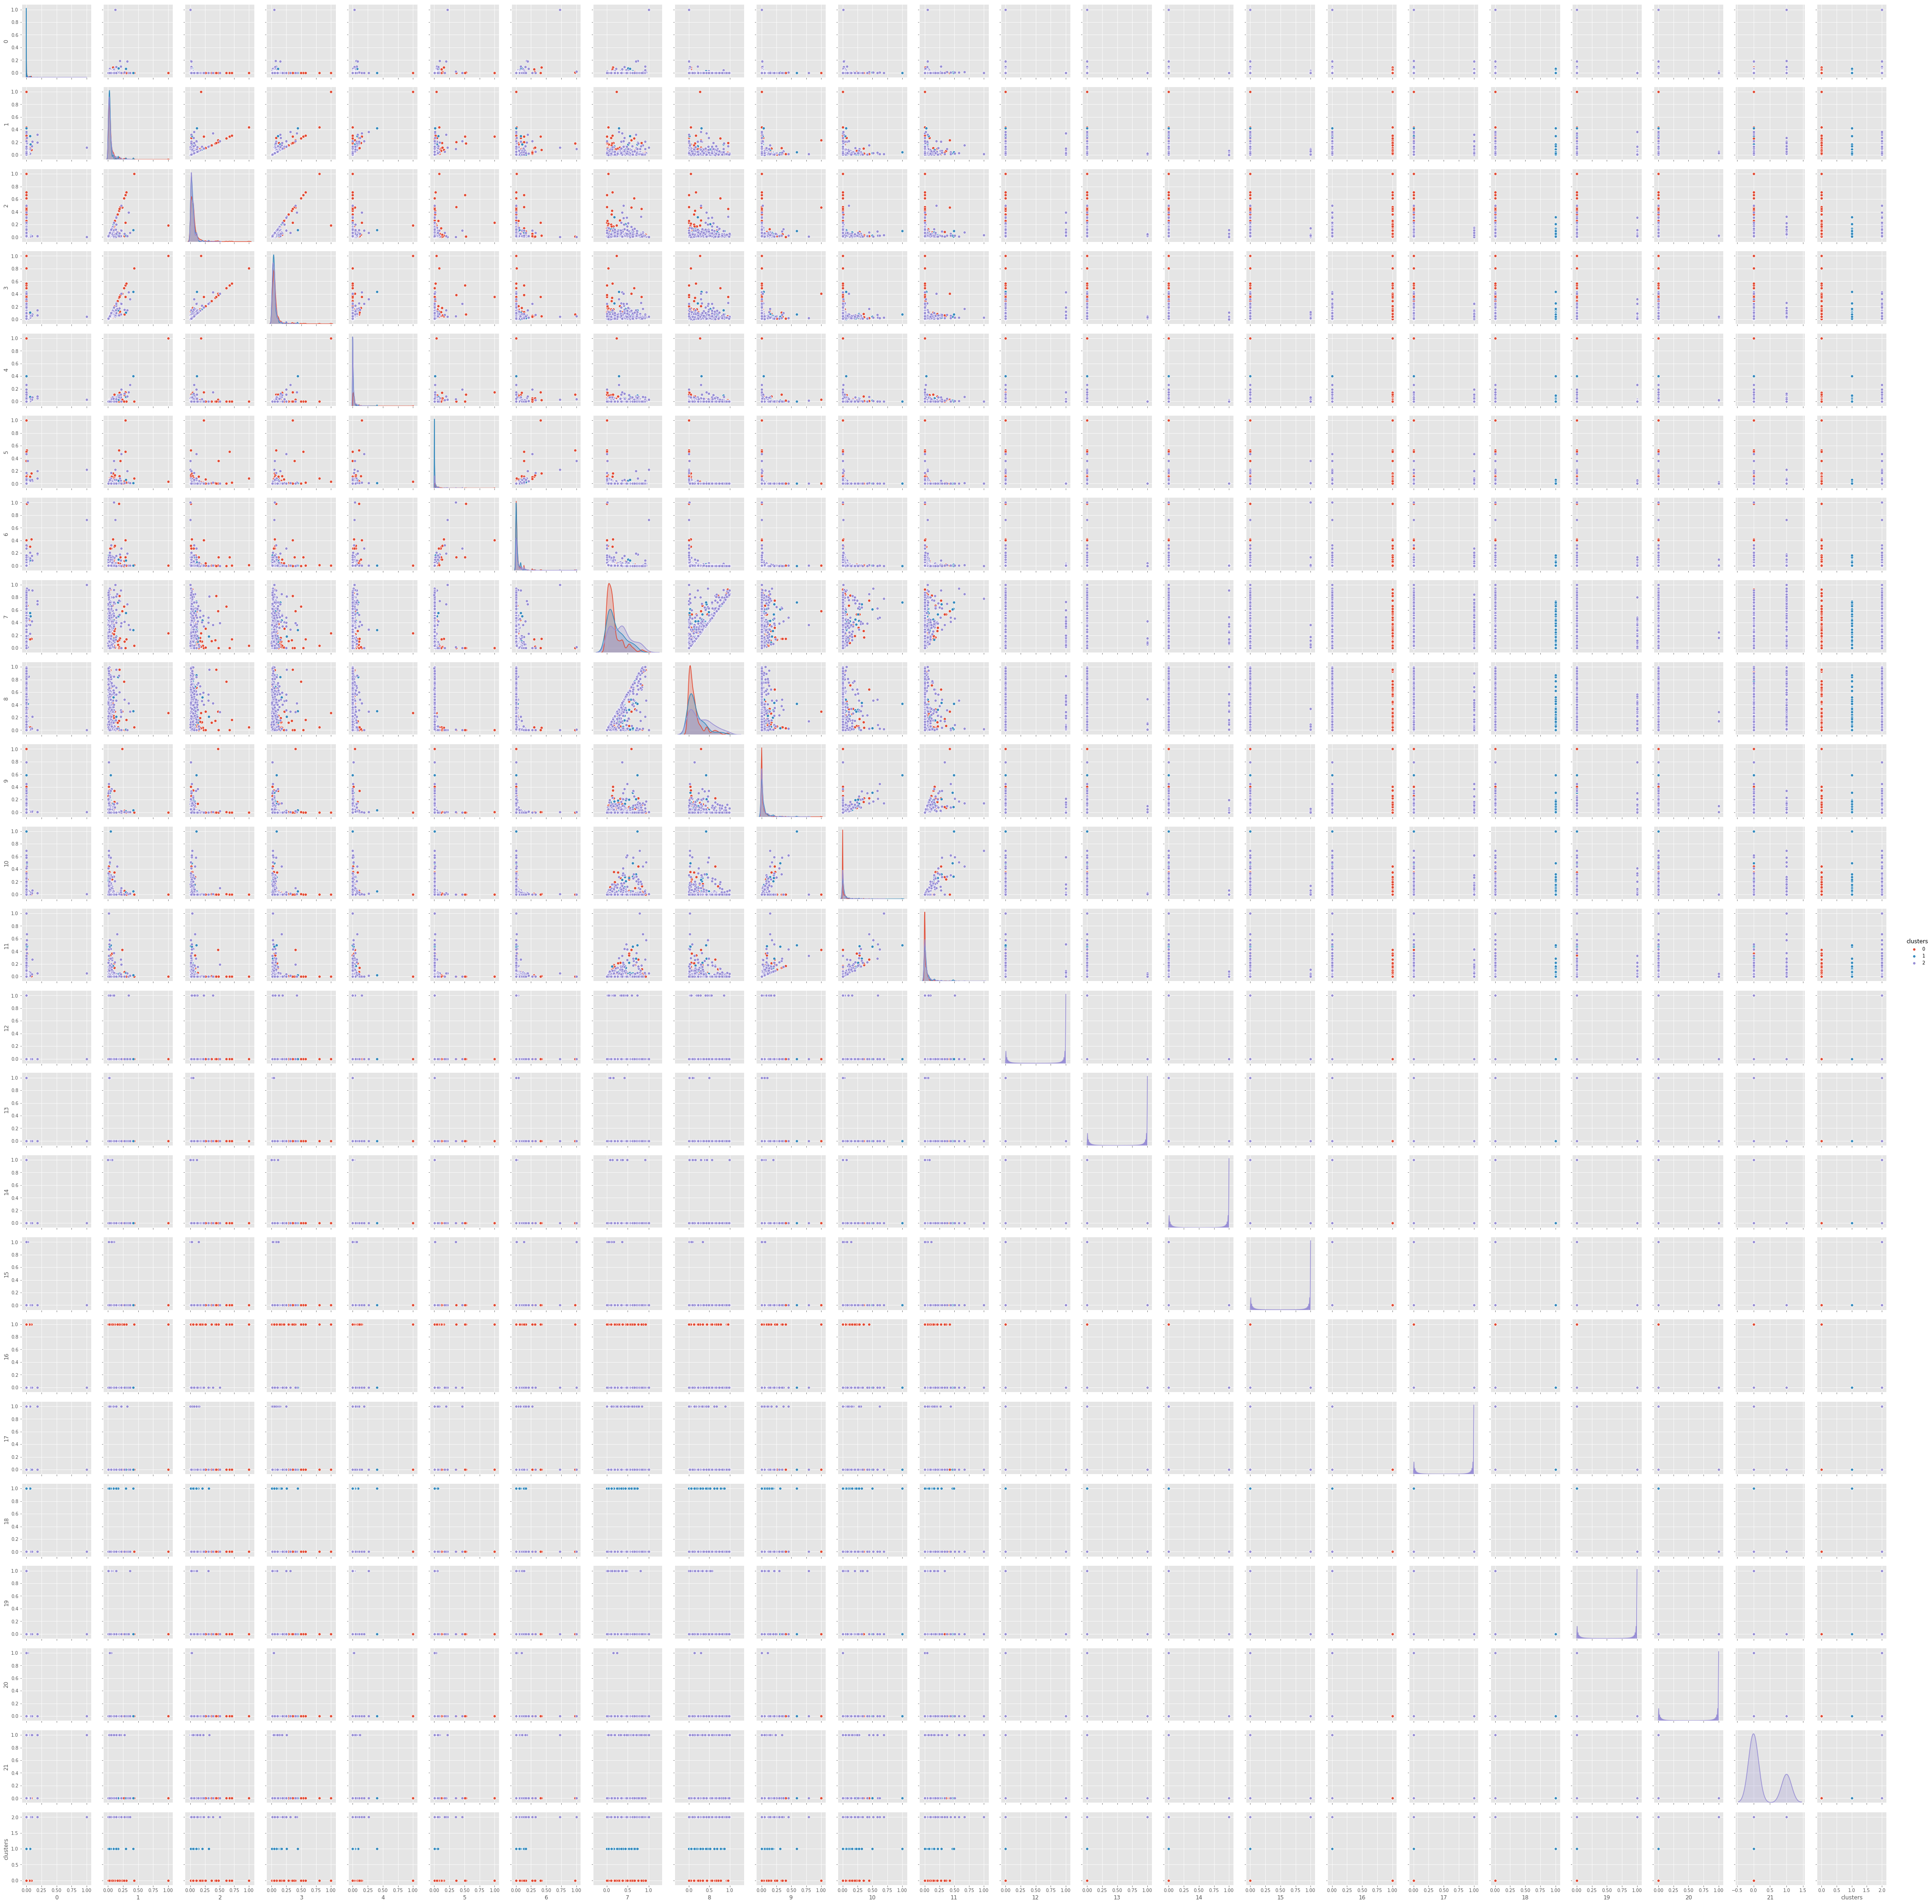

In [18]:
sns.pairplot(df2, hue='clusters')

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


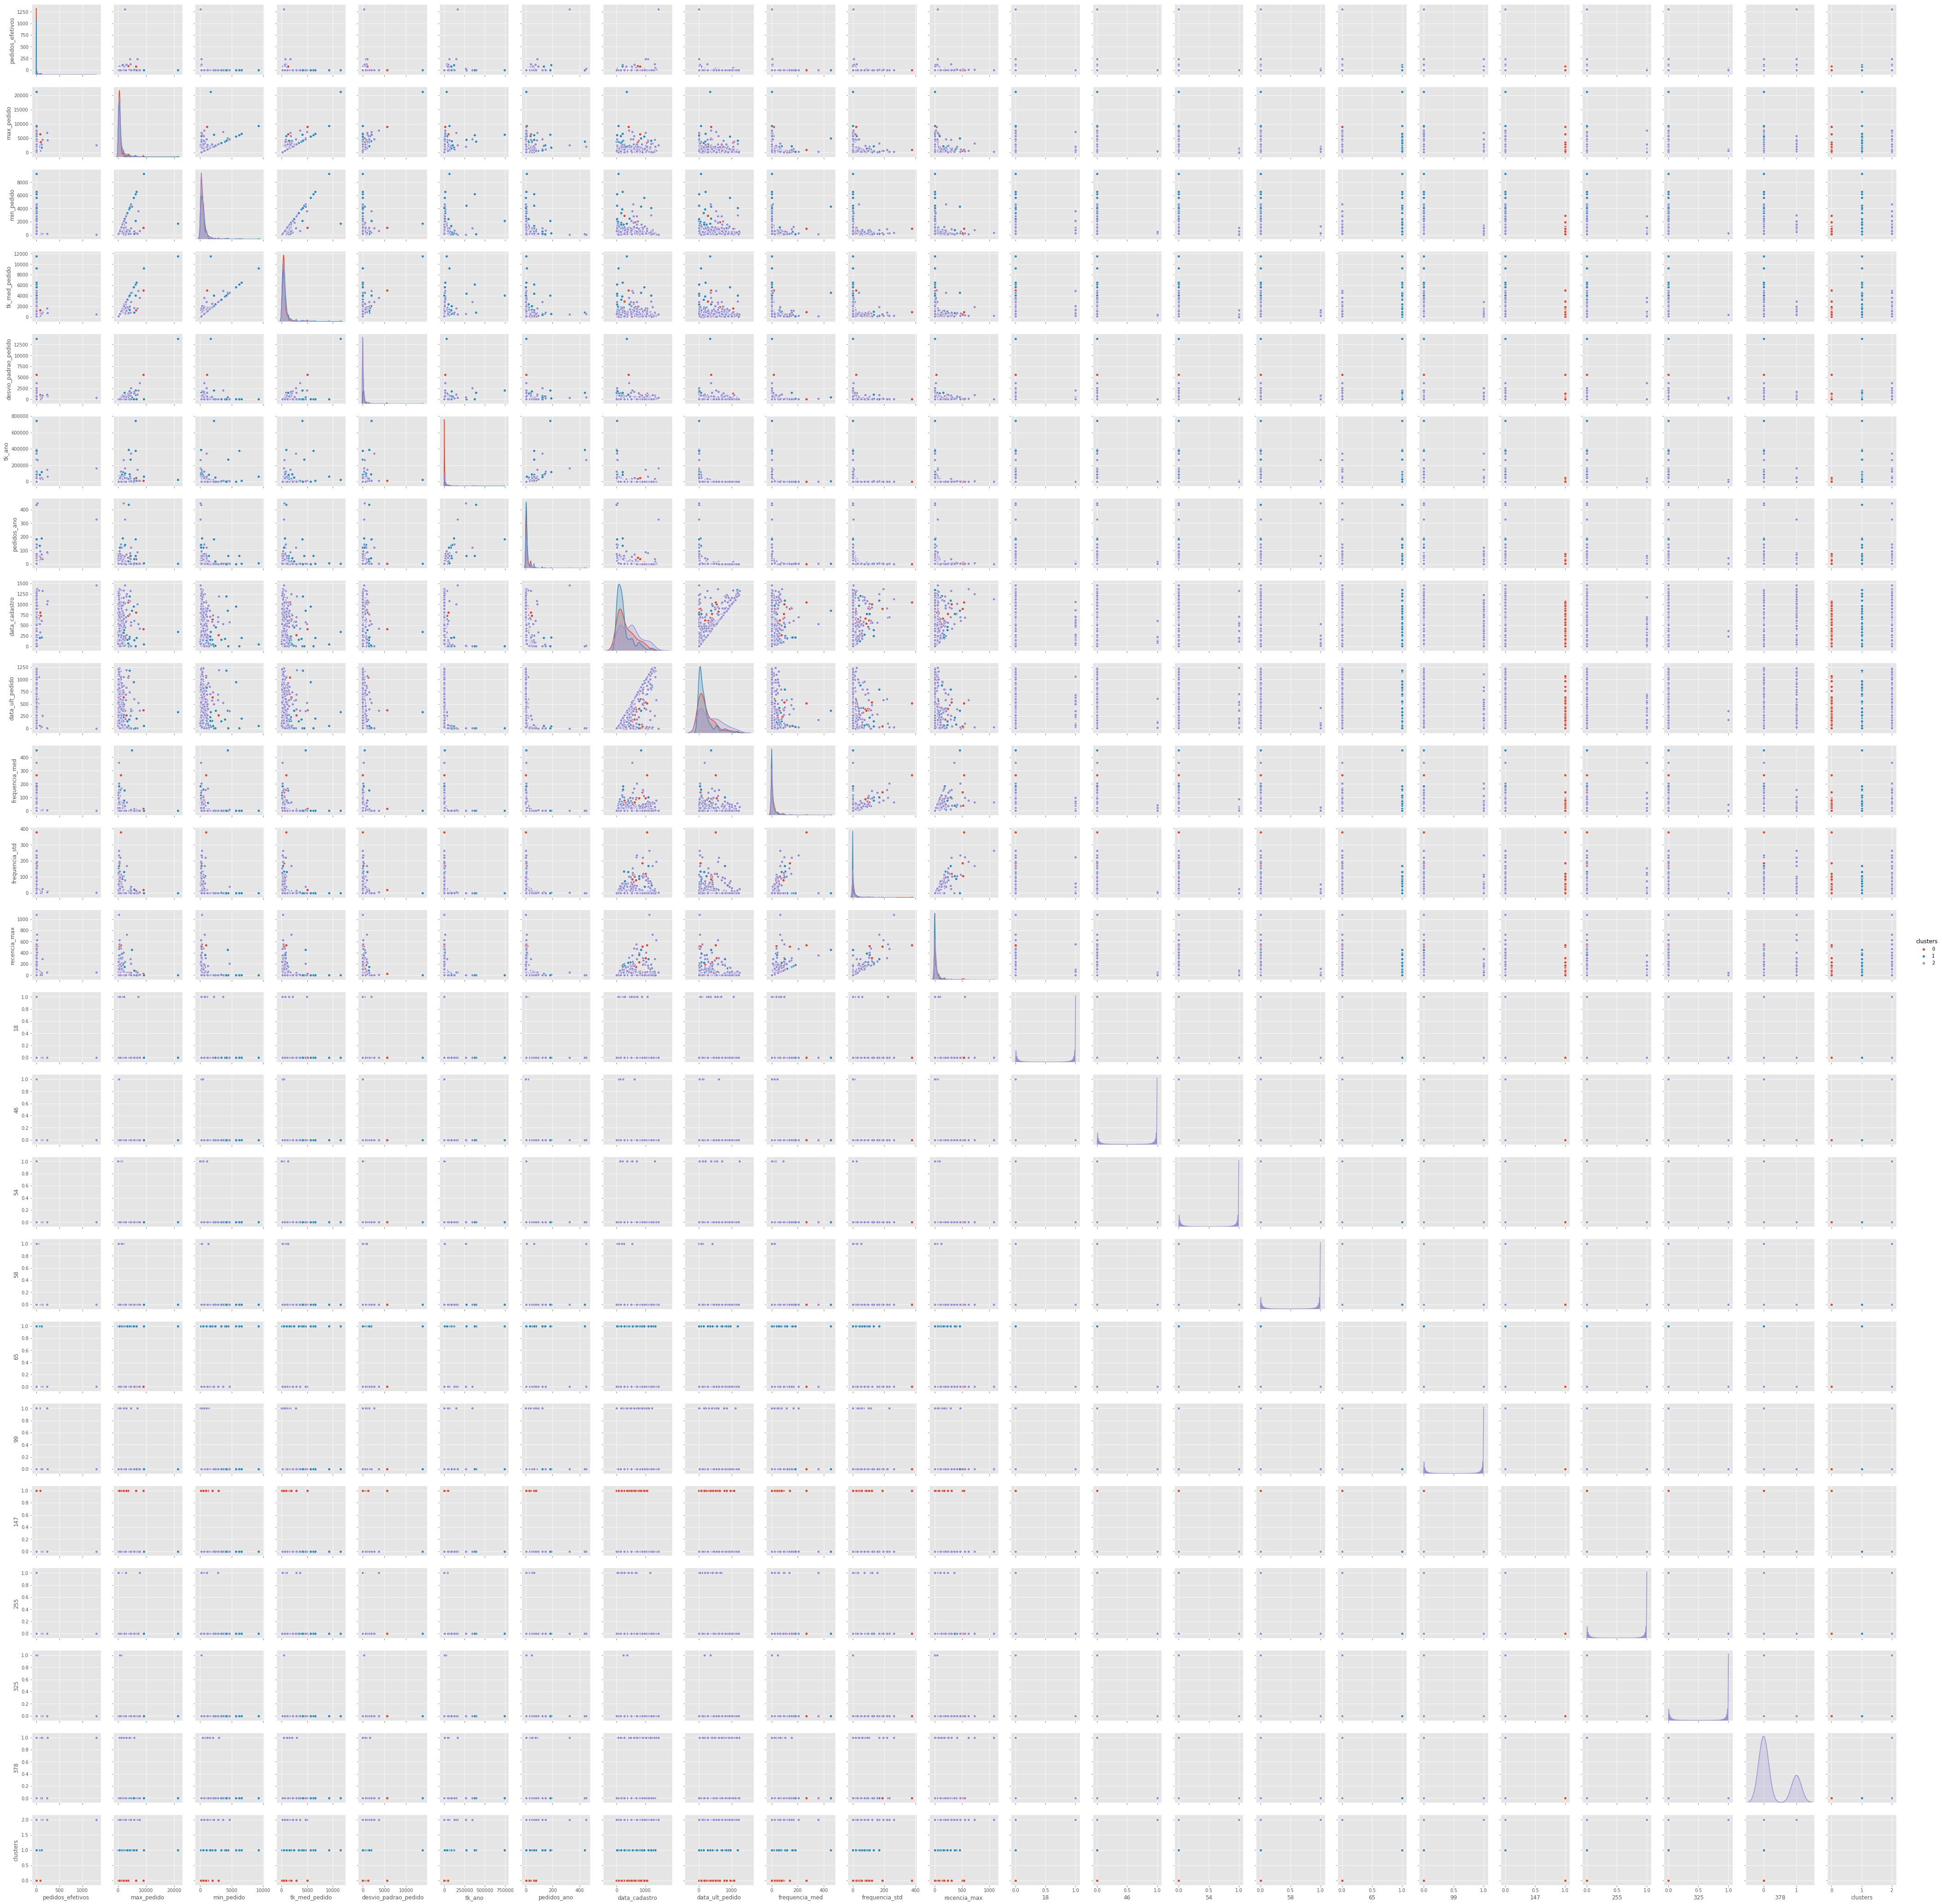

In [9]:
sns.pairplot(df, hue='clusters')

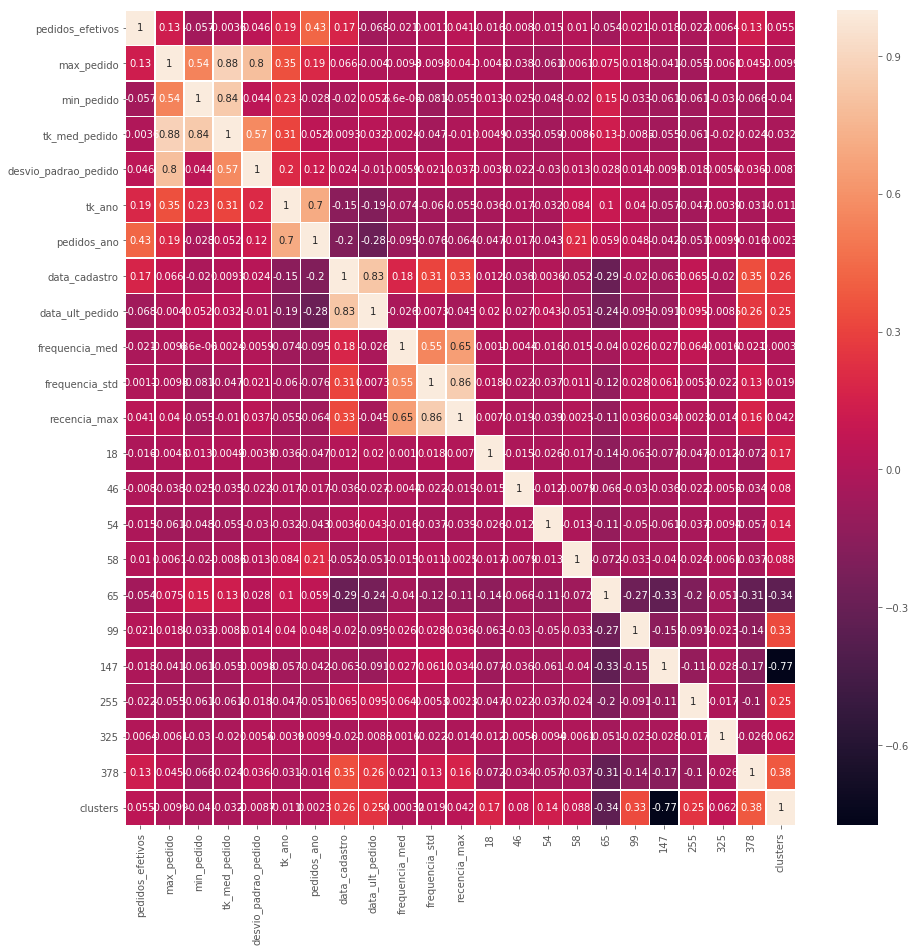

In [10]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)

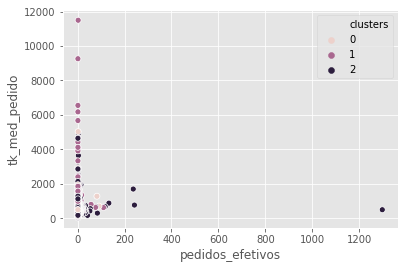

In [11]:
sns.scatterplot(x=df['pedidos_efetivos'], y=df['tk_med_pedido'], hue=df['clusters'])

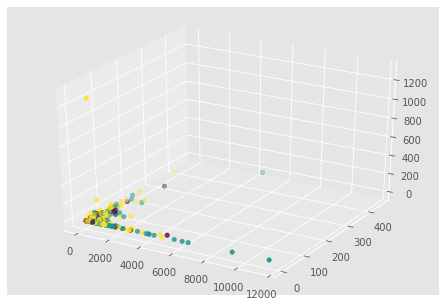

In [13]:
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure()
ax= Axes3D(fig)
A= df['tk_med_pedido']
B= df['frequencia_med']
C= df['pedidos_efetivos']

ax.scatter(A,B,C, c= df['clusters'], marker= "o")

In [14]:
df.idxmax()

pedidos_efetivos              3
max_pedido                21877
min_pedido              1319349
tk_med_pedido             21877
desvio_padrao_pedido      21877
tk_ano                  1604289
pedidos_ano             1501154
data_cadastro                 3
data_ult_pedido             264
frequencia_med             2395
frequencia_std             1294
recencia_max                816
18                         5258
46                       152648
54                       301160
58                        66146
65                       218003
99                         1456
147                        3692
255                        4776
325                      132766
378                           3
clusters                      3
dtype: int64

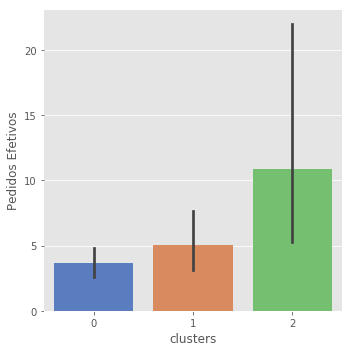

In [20]:
g = sns.catplot(x="clusters", y="pedidos_efetivos", data=df, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Pedidos Efetivos")

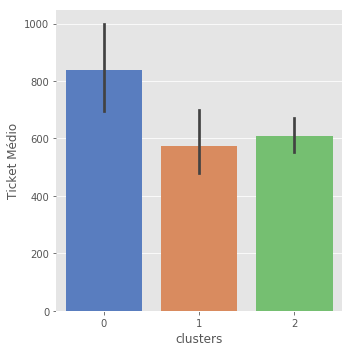

In [21]:
g = sns.catplot(x="clusters", y="tk_med_pedido", data=df, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Ticket Médio")

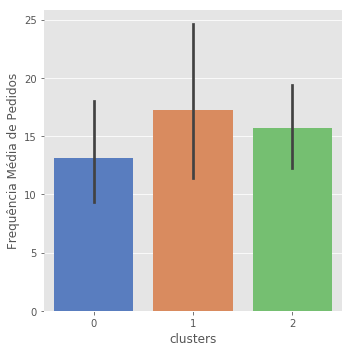

In [23]:
g = sns.catplot(x="clusters", y="frequencia_med", data=df, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Frequência Média de Pedidos")

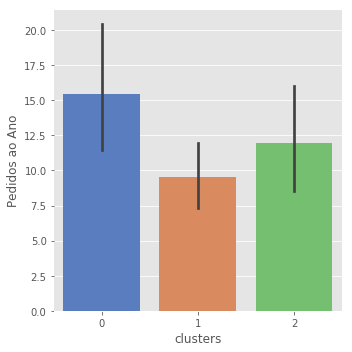

In [41]:
g = sns.catplot(x="clusters", y="pedidos_ano", data=df, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Pedidos ao Ano")

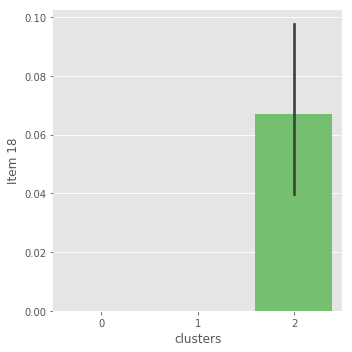

In [31]:
g = sns.catplot(x="clusters", y="18", data=df, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Item 18")

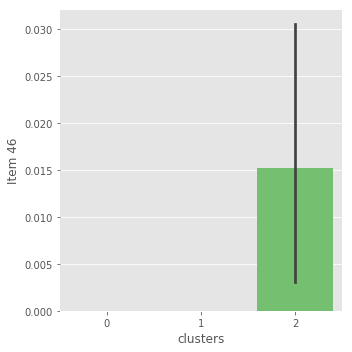

In [32]:
g = sns.catplot(x="clusters", y="46", data=df, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Item 46")

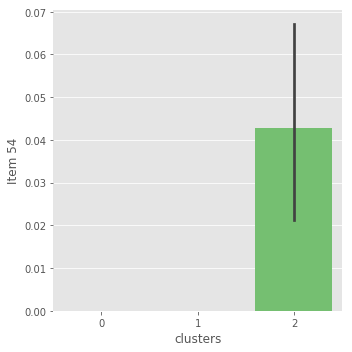

In [33]:
g = sns.catplot(x="clusters", y="54", data=df, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Item 54")

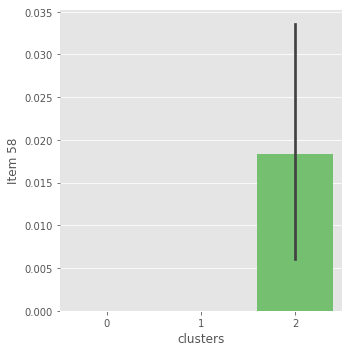

In [34]:
g = sns.catplot(x="clusters", y="58", data=df, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Item 58")

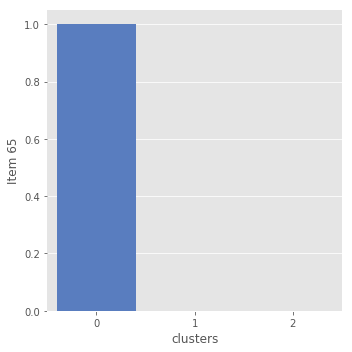

In [35]:
g = sns.catplot(x="clusters", y="65", data=df, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Item 65")

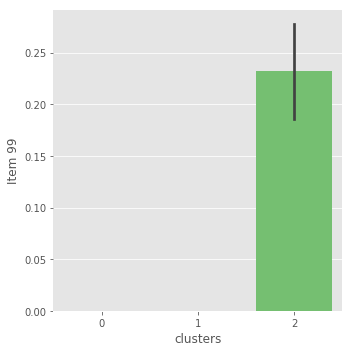

In [36]:
g = sns.catplot(x="clusters", y="99", data=df, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Item 99")

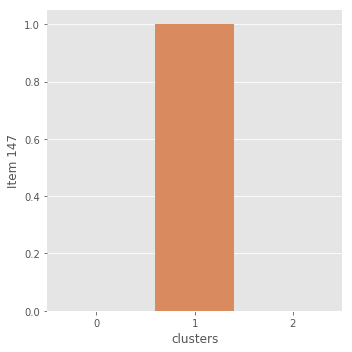

In [37]:
g = sns.catplot(x="clusters", y="147", data=df, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Item 147")

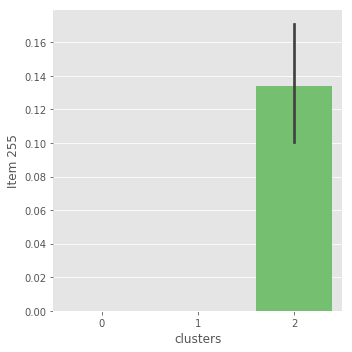

In [38]:
g = sns.catplot(x="clusters", y="255", data=df, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Item 255")

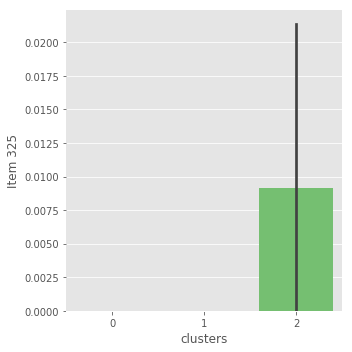

In [39]:
g = sns.catplot(x="clusters", y="325", data=df, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Item 325")

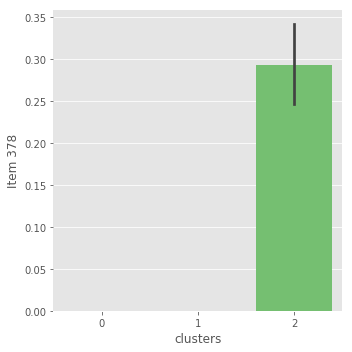

In [40]:
g = sns.catplot(x="clusters", y="378", data=df, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Item 378")